In [1]:
from psd_tools import PSDImage
import torch
import numpy as np
from PIL import Image
from diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion_layers2img import unpack_layers
import json

/home/lukovdg1/.conda/envs/dreambooth/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def image_grid(imgs, cols=None, padding=2):
    cols = len(imgs) if cols is None else cols
    w, h = imgs[0].size
    grid_w = w * cols + padding * (cols - 1)
    rows = int(np.ceil(len(imgs) / cols))
    grid_h = h * rows + padding * (rows - 1)
    grid = Image.new('RGB', (grid_w, grid_h), (127, 127, 127))

    for i, img in enumerate(imgs):
        x = i % cols * (w + padding)
        y = i // cols * (h + padding)
        grid.paste(img, box=(x, y))
    return grid

In [3]:
def tensor_to_pil(x, resolution=64):
    ar = x.shape[1] / x.shape[0]
    img = Image.fromarray((x * 255).byte().numpy())
    resized = img.resize((resolution, int(resolution*ar)), Image.Resampling.NEAREST)
    return resized

In [4]:
img = PSDImage.open("lion.psd")

In [5]:
spec = unpack_layers(img)

global prompt: art by greg rutkowski, wlop
global negative prompt: deformed, disfigured, ugly eyes, deformed eyes
Layer 0
prompt: background is a beautiful green forest
negative prompt: 


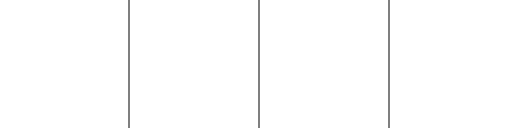

Layer 1
prompt: a photo of a lion
negative prompt: 


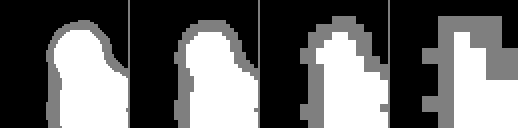

Layer 2
prompt: [P] lion’s head
negative prompt: 


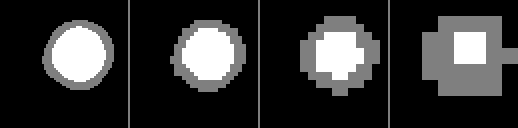

In [6]:
print("global prompt:", spec["global"]["pos"])
print("global negative prompt:", spec["global"]["neg"])
for i, layer in enumerate(spec["layers"]):
    print(f"Layer {i}")
    gridimages = []
    for k in list(layer.keys()):
        v = layer[k]
        if k == "pos":
            print("prompt:", v)
        elif k == "neg":
            print("negative prompt:", v)
        elif k == "mode":
            pass
        elif k == (512, 512):
            pass
        else:
            gridimages.append(tensor_to_pil(v, 128))
    display(image_grid(gridimages))